In [6]:
import pandas as pd
import seaborn as sns

# Create DataFrame
data = {
    "Noise": [0, 1, 2.5, 5, 10, 20],
    "K-NN": [72.83, 72.25, 72.54, 69.36, 67.05, 63.87],
    "Simple N.N.": [81.21, 82.95, 83.24, 84.97, 81.21, 75.43],
    "Complex N.N.": [82.37, 83.53, 82.95, 81.21, 78.90, 73.99],
    "Decision Tree": [75.43, 71.09, 70.23, 73.12, 65.89, 64.45],
    "Random Forest": [78.32, 77.16, 76.30, 76.58, 74.85, 73.12],
    "SVM": [81.50, 81.21, 82.08, 80.64, 81.21, 77.46],
}
df = pd.DataFrame(data)
desc_stats = df.describe()
print(desc_stats)

           Noise       K-NN  Simple N.N.  Complex N.N.  Decision Tree  \
count   6.000000   6.000000     6.000000      6.000000       6.000000   
mean    6.416667  69.650000    81.501667     80.491667      70.035000   
std     7.552593   3.618757     3.291932      3.581175       4.198751   
min     0.000000  63.870000    75.430000     73.990000      64.450000   
25%     1.375000  67.627500    81.210000     79.477500      66.975000   
50%     3.750000  70.805000    82.080000     81.790000      70.660000   
75%     8.750000  72.467500    83.167500     82.805000      72.612500   
max    20.000000  72.830000    84.970000     83.530000      75.430000   

       Random Forest        SVM  
count       6.000000   6.000000  
mean       76.055000  80.683333  
std         1.830473   1.647066  
min        73.120000  77.460000  
25%        75.212500  80.782500  
50%        76.440000  81.210000  
75%        77.015000  81.427500  
max        78.320000  82.080000  


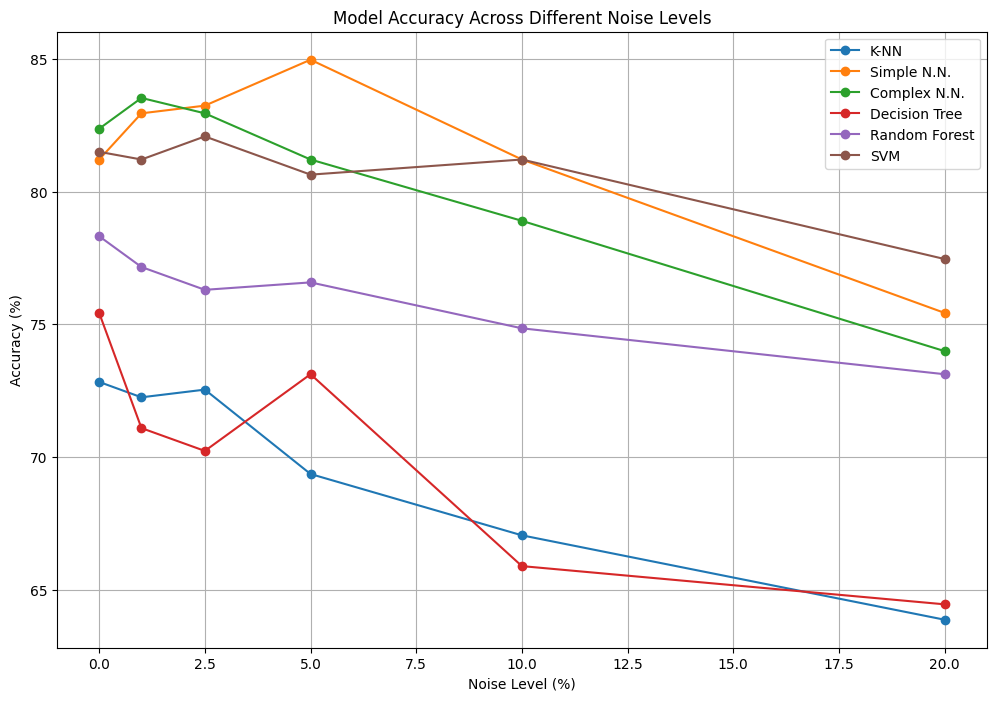

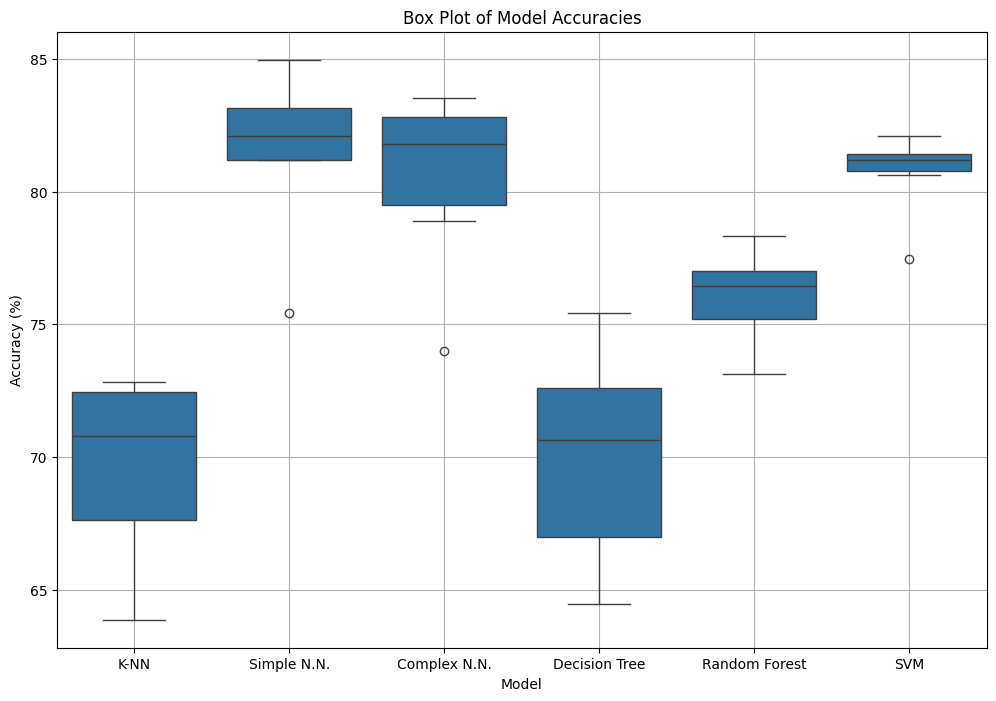

In [7]:
import matplotlib.pyplot as plt

# Line plot for model accuracy across noise levels
plt.figure(figsize=(12, 8))
for col in df.columns[1:]:
    plt.plot(df["Noise"], df[col], marker="o", label=col)
plt.title("Model Accuracy Across Different Noise Levels")
plt.xlabel("Noise Level (%)")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

# Box plot for model accuracies
plt.figure(figsize=(12, 8))
df_melt = pd.melt(
    df,
    id_vars=["Noise"],
    value_vars=[
        "K-NN",
        "Simple N.N.",
        "Complex N.N.",
        "Decision Tree",
        "Random Forest",
        "SVM",
    ],
    var_name="Model",
    value_name="Accuracy",
)
sns.boxplot(x="Model", y="Accuracy", data=df_melt)
plt.title("Box Plot of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame
data = {
    "Noise": [0, 1, 2.5, 5, 10, 20],
    "K-NN": [72.83, 72.25, 72.54, 69.36, 67.05, 63.87],
    "Simple N.N.": [81.21, 82.95, 83.24, 84.97, 81.21, 75.43],
    "Complex N.N.": [82.37, 83.53, 82.95, 81.21, 78.90, 73.99],
    "Decision Tree": [75.43, 71.09, 70.23, 73.12, 65.89, 64.45],
    "Random Forest": [78.32, 77.16, 76.30, 76.58, 74.85, 73.12],
    "SVM": [81.50, 81.21, 82.08, 80.64, 81.21, 77.46],
}
df = pd.DataFrame(data)

# Calculate accuracy retention
accuracy_retention = df.copy()
for col in df.columns[1:]:
    accuracy_retention[col] = df[col] / df[col][0] * 100

# Plot accuracy retention
plt.figure(figsize=(12, 8))
for col in accuracy_retention.columns[1:]:
    plt.plot(
        accuracy_retention["Noise"], accuracy_retention[col], marker="o", label=col
    )
plt.title("Accuracy Retention Across Different Noise Levels")
plt.xlabel("Noise Level (%)")
plt.ylabel("Accuracy Retention (%)")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
accuracy_retention = df.copy()
for col in df.columns[1:]:
    accuracy_retention[col] = df[col] / df[col][0] * 100

print(accuracy_retention)

   Noise        K-NN  Simple N.N.  Complex N.N.  Decision Tree  Random Forest  \
0    0.0  100.000000   100.000000    100.000000     100.000000     100.000000   
1    1.0   99.203625   102.142593    101.408280      94.246321      98.518897   
2    2.5   99.601812   102.499692    100.704140      93.106191      97.420838   
3    5.0   95.235480   104.629972     98.591720      96.937558      97.778345   
4   10.0   92.063710   100.000000     95.787301      87.352512      95.569459   
5   20.0   87.697377    92.882650     89.826393      85.443458      93.360572   

          SVM  
0  100.000000  
1   99.644172  
2  100.711656  
3   98.944785  
4   99.644172  
5   95.042945  
